In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set
import math
import re

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [3]:
#Dowmning Dataset
df = pd.read_csv('C:/Users/HP/Downloads/data.csv', parse_dates=['date'], index_col='date')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
df.describe(include="all")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4600 entries, 2014-05-02 to 2014-07-10
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)

Since all the houses is from USA, we are removing the country column 

In [27]:
df.drop(columns=['country'], inplace=True)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
date,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042


# Exploratory Data Analysis

In [ ]:
df.plot()

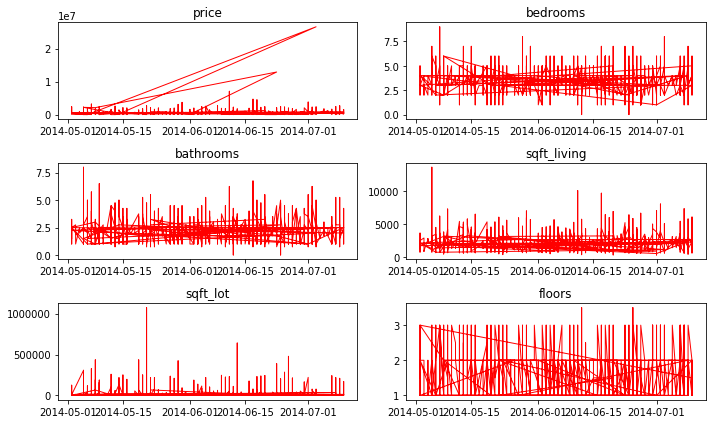

In [11]:
# Plot
fig, axes = plt.subplots(3, 2, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    
    plt.tight_layout();

In [14]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

from the above we can see that there are no missing data

# Convert categorical value into numerical value

In [28]:
#To know if city has impact to house price, we have to convert city categorical value into numerical value
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df['city_num'] = lb_make.fit_transform(df["city"])
df[["city","city_num","price"]].head(3)

,city,city_num,price
date,,,
2014-05-02,Shoreline,36,313000.0
2014-05-02,Seattle,35,2384000.0
2014-05-02,Kent,18,342000.0


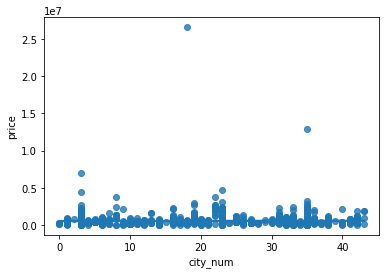

In [29]:
sns.regplot(x="city_num", y="price", data=df)

In [31]:
df[["city_num","price"]].corr()

,city_num,price
city_num,1.000000,0.018625
price,0.018625,1.000000


# State zip column

In [33]:
df["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

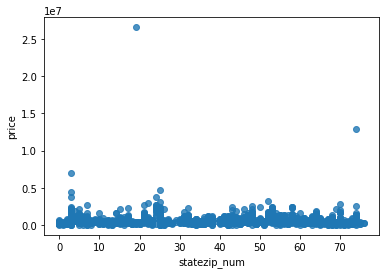

In [34]:
df['statezip_num'] = lb_make.fit_transform(df["statezip"])
sns.regplot(x="statezip_num", y="price", data=df)

In [35]:
df[["statezip_num","price"]].corr()

,statezip_num,price
statezip_num,1.000000,-0.043385
price,-0.043385,1.000000


from the above exploration we can see that statezip, city, and street column dont have strong correlation with price

# Correlation & causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation

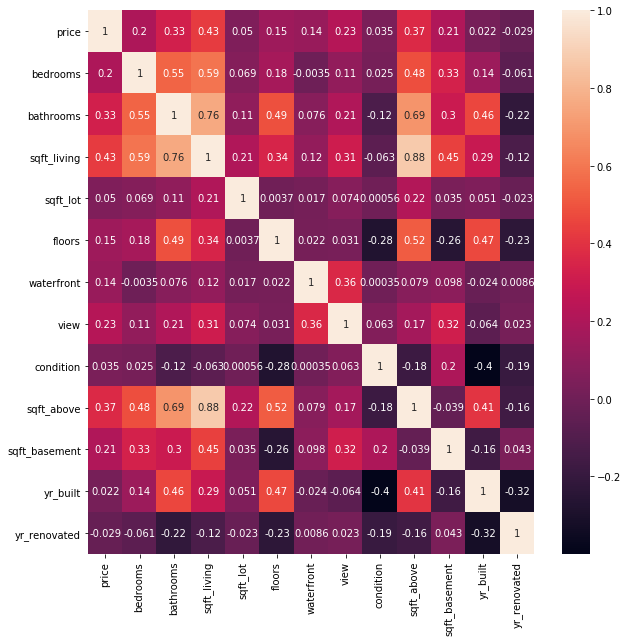

In [36]:
corr=df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 
         'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].corr()

ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values) 

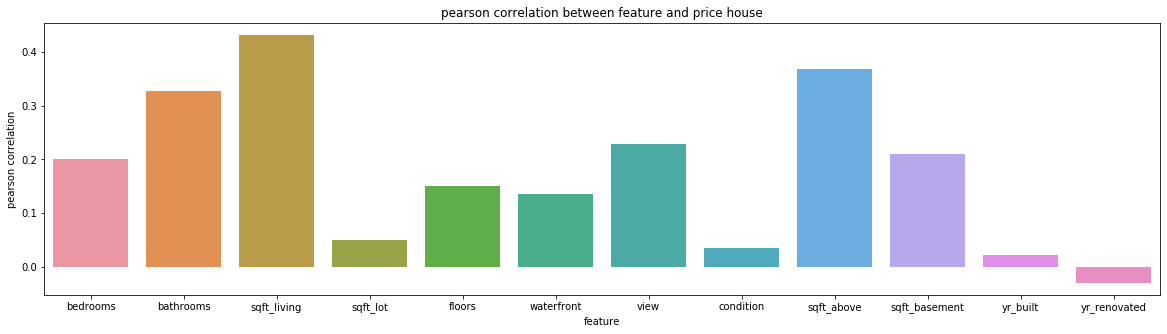

In [39]:
from scipy import stats
var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']

pear_corr = []

for item in var:
  temp = stats.pearsonr(df[item], df['price'])[0]
  pear_corr.append(temp)
plt.figure(figsize=(20,5))
plt.title('pearson correlation between feature and price house')
ax = sns.barplot(x=var, y=pear_corr)
ax.set(xlabel='feature', ylabel='pearson correlation')

plt.show()

Pearson Correlation</p>

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.

# yr_renovated, yr_built, and condition

# yr_renovated

In [41]:
df[["yr_renovated","price"]].head(3)

,yr_renovated,price
date,,
2014-05-02,2005,313000.0
2014-05-02,0,2384000.0
2014-05-02,0,342000.0


In [42]:
df["yr_renovated"].value_counts().head(10)

0       2735
2000     170
2003     151
2001     109
2009     109
2005      95
2004      77
2014      72
2006      68
2013      61
Name: yr_renovated, dtype: int64

since this feature has so many 0 (zero) / unknown value i suggest to not iclude this to build our model

# yr_built

In [43]:
df["yr_built"].value_counts()

2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

Text(0.5, 1.0, 'number of house based on year built')

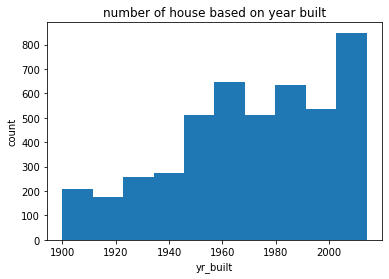

In [44]:
plt.hist(df["yr_built"])

plt.xlabel("yr_built")
plt.ylabel("count")
plt.title("number of house based on year built")

In [46]:
bins = np.linspace(min(df["yr_built"]), max(df["yr_built"]), 5)
bins

array([1900. , 1928.5, 1957. , 1985.5, 2014. ])

In [47]:
group_names = ['early 90s', 'mid 90s', 'late 90s', '20s']

df['yr_built_binned'] = pd.cut(df['yr_built'], bins, labels=group_names, include_lowest=True )
df[['yr_built_binned','yr_built']].head(4)

,yr_built_binned,yr_built
date,,
2014-05-02,mid 90s,1955
2014-05-02,early 90s,1921
2014-05-02,late 90s,1966
2014-05-02,late 90s,1963


In [48]:
df['yr_built_binned'].value_counts()

20s          1755
late 90s     1380
mid 90s       891
early 90s     574
Name: yr_built_binned, dtype: int64

Text(0.5, 1.0, 'number of house based on year built')

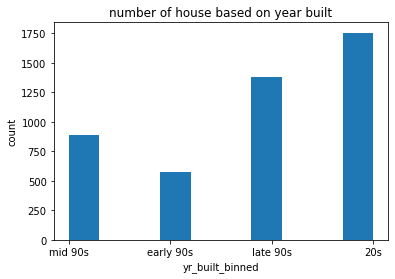

In [49]:
plt.hist(df["yr_built_binned"])

plt.xlabel("yr_built_binned")
plt.ylabel("count")
plt.title("number of house based on year built")

In [50]:
replace_year = {'temp': {'early 90s':1, 'mid 90s':2, 'late 90s':3, '20s':4}}
df["yr_built_binned"] = df["yr_built_binned"].astype('category')


In [53]:
df["yr_built_binned_num2"] = df["yr_built_binned"].cat.codes
df["yr_built_binned_num2"].value_counts()

3    1755
2    1380
1     891
0     574
Name: yr_built_binned_num2, dtype: int64

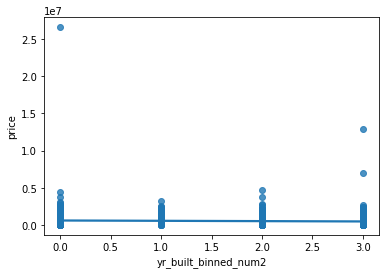

In [54]:
df['yr_built_binned_num2'] = lb_make.fit_transform(df["yr_built_binned"])
sns.regplot(x="yr_built_binned_num2", y="price", data=df)

In [55]:
df[["yr_built_binned_num2","price"]].corr()

,yr_built_binned_num2,price
yr_built_binned_num2,1.000000,-0.088026
price,-0.088026,1.000000


# condition

In [56]:
df["condition"].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

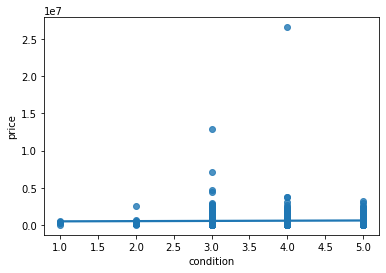

In [57]:
sns.regplot(x="condition", y="price", data=df)

In [58]:
df[["condition", "price"]].corr()

,condition,price
condition,1.000000,0.034915
price,0.034915,1.000000


based on exploration above, I choose this feature since there is linear correlation between price and condition.